In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Region,area,edad,etnia,sexo,cuartil_riqueza2015,afiliado,tamanho_HH,niveledu,niveledu_MADRE,niveledu_jefe,act_economica_jefe,act_economica_MADRE,estadoImc8,BAZ
0,1,1. ATLANTICO,1,15,3.0,1,3,1.0,2,2.0,3.0,3.0,NaN,NaN,2.0,-1.28
1,2,1. ATLANTICO,1,13,3.0,1,3,1.0,2,1.0,3.0,3.0,NaN,NaN,2.0,-0.11
2,3,1. ATLANTICO,1,17,3.0,2,3,1.0,2,2.0,3.0,3.0,2.0,2.0,1.0,-2.22
3,4,1. ATLANTICO,1,17,3.0,2,3,1.0,2,2.0,1.0,1.0,2.0,2.0,2.0,0.48
4,5,1. ATLANTICO,1,17,3.0,2,2,2.0,2,2.0,3.0,3.0,3.0,3.0,2.0,0.60


In [2]:
df['Region'] = df['Region'].str.extract(r'^(\d+)').astype(int)
df['sexo'] = df['sexo'].map({1: 1, 2: 0})
df['malnutricion'] = df['estadoImc8'].replace({
    2: "0",  # Normal
    1: "1",  # Desnutrición
    3: "1"   # Exceso de peso
})
df = df.drop(columns=['estadoImc8','BAZ', 'Unnamed: 0'], axis=1)
df.head()

,Region,area,edad,etnia,sexo,cuartil_riqueza2015,afiliado,tamanho_HH,niveledu,niveledu_MADRE,niveledu_jefe,act_economica_jefe,act_economica_MADRE,malnutricion
0,1,1,15,3.0,1,3,1.0,2,2.0,3.0,3.0,NaN,NaN,0
1,1,1,13,3.0,1,3,1.0,2,1.0,3.0,3.0,NaN,NaN,0
2,1,1,17,3.0,0,3,1.0,2,2.0,3.0,3.0,2.0,2.0,1
3,1,1,17,3.0,0,3,1.0,2,2.0,1.0,1.0,2.0,2.0,0
4,1,1,17,3.0,0,2,2.0,2,2.0,3.0,3.0,3.0,3.0,0


# Análisis de valores faltantes

En esta sección se analizan los valores faltantes y se toman las medidas necesarias. En este caso se tiene que la variable que en general hay un porcentaje bajo de valores faltantes, sin embargo la variable referente a la actividad económica de la madre tiene un porcentaje muy alto de valores faltantes, superior al 60%, los valores faltantes pueden ser por multiples razones por lo que se desconsidera la variable. Por otro lado, las variables referentes al nivel educativo de la madre y la actividad económica del jefe del hogar, tienen un porcentaje de valores faltantes superior al 20%.

In [44]:
(df.isnull().mean() * 100).round(2)

,0
Unnamed: 0,0.00
Region,0.00
area,0.00
edad,0.00
etnia,1.10
sexo,0.00
cuartil_riqueza2015,0.00
afiliado,0.46
tamanho_HH,0.00
niveledu,0.27


<Axes: >

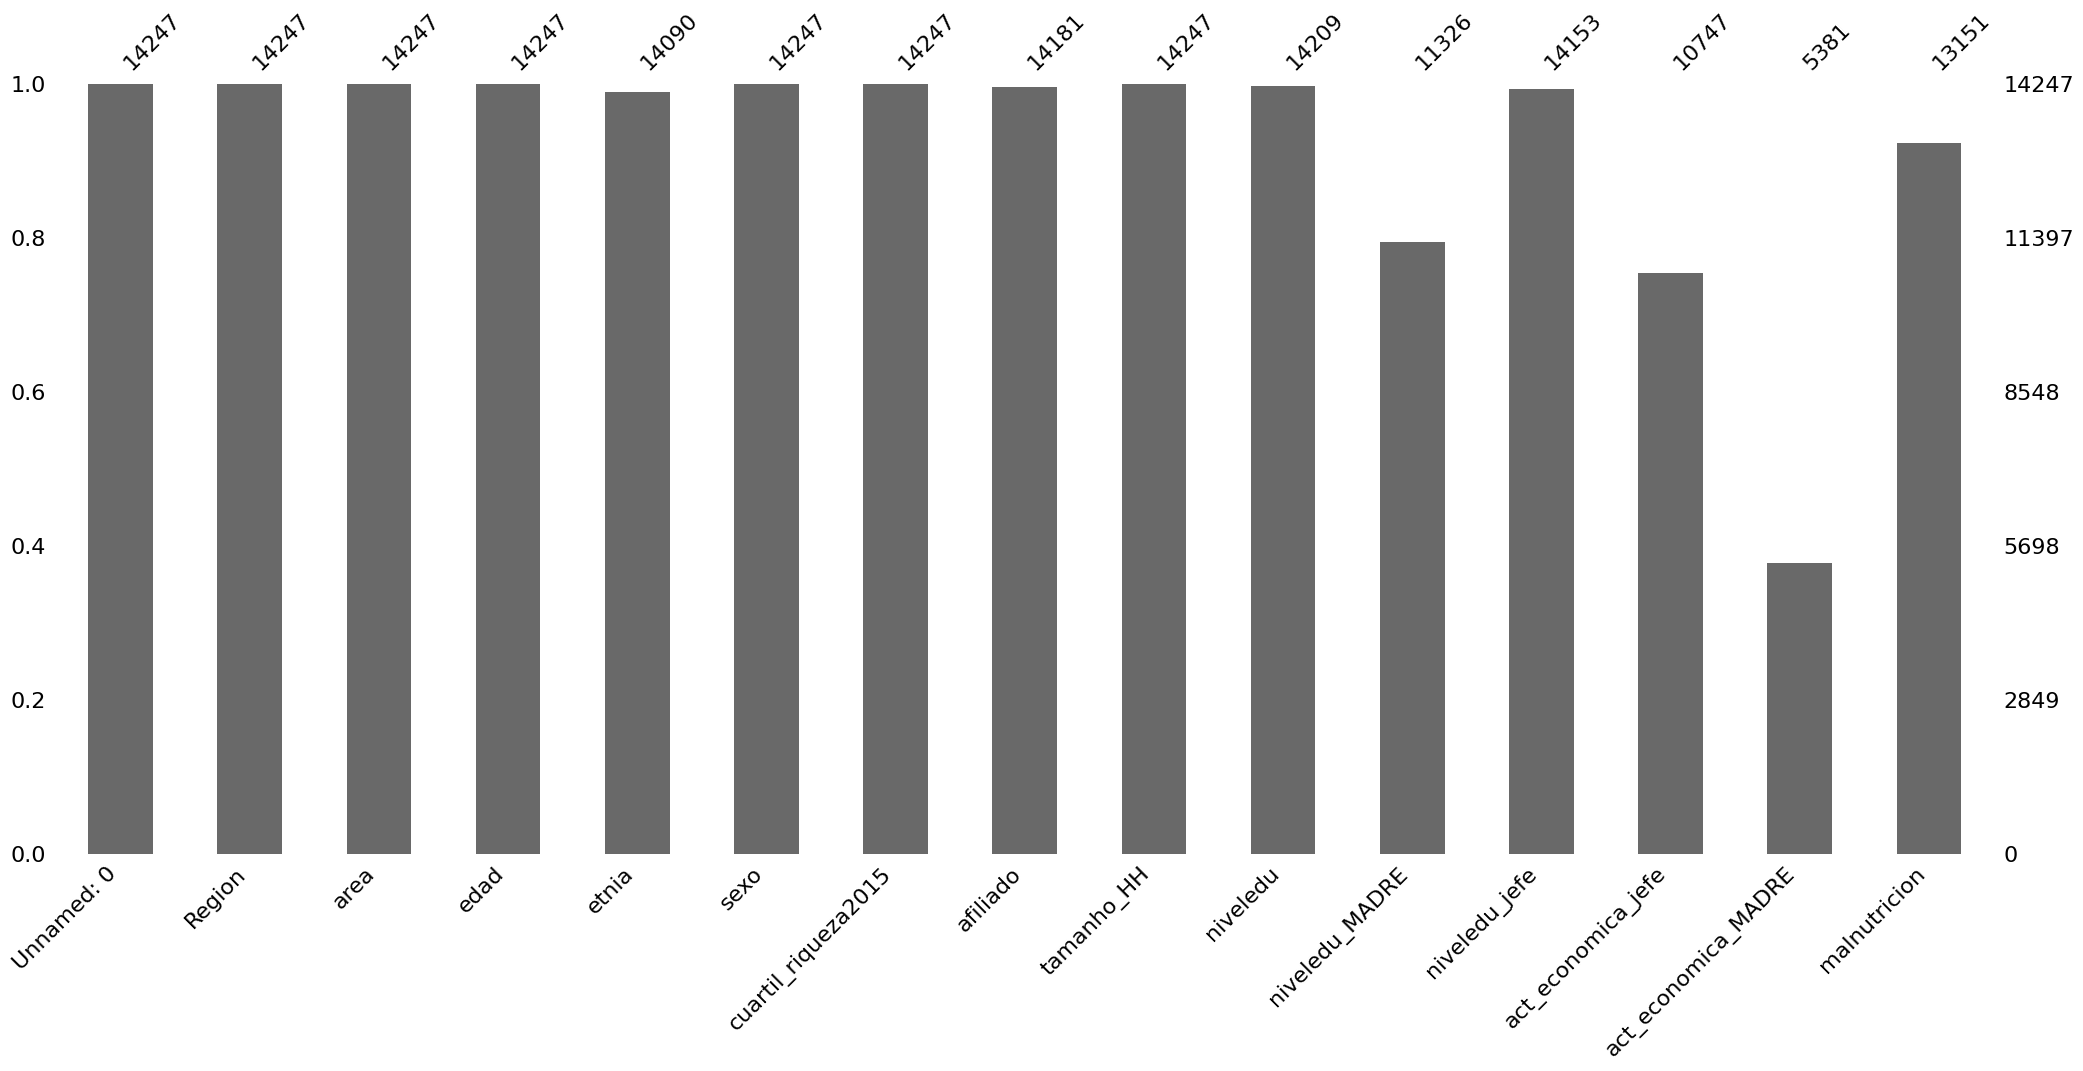

In [45]:
import missingno as msno

msno.bar(df)


Observando en el mapa de calor de valores faltantes las variables con mayor porcentaje de valores faltantes, niveledu_MADRE y act_economica_jefe, tienen su mayor proporción de valores faltante coincidentes con la variable desconsiderada referente a la actividad económica de la madre. No se puede decir que exista una relación demasiado fuerte entre la proporción de valores faltantes y otra variable por lo que se dice que hay valores faltantes completamente aleatorios.

<Axes: >

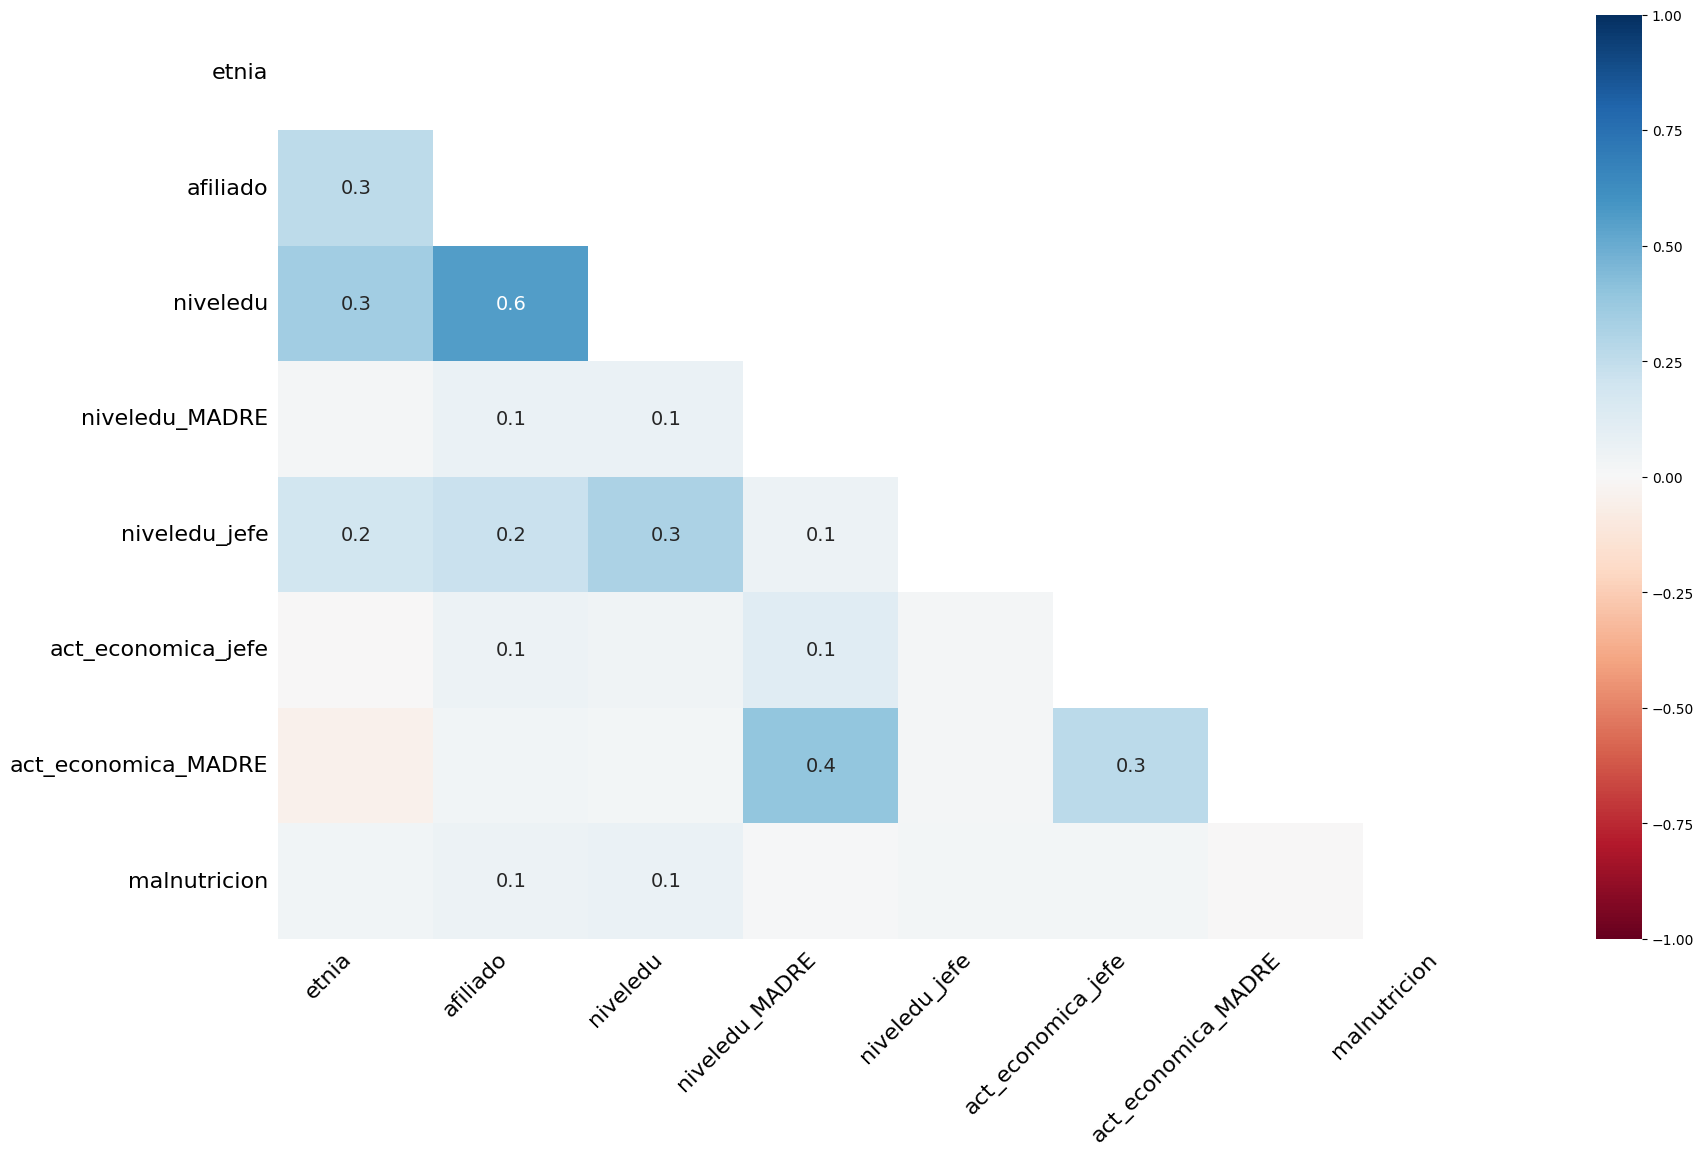

In [46]:
msno.heatmap(df)

In [3]:
df_limpio = df.drop(columns = ['act_economica_MADRE'], axis=1)

df_limpio = df_limpio.dropna()

df_limpio_encoded = pd.get_dummies(df_limpio, columns=['Region','area','etnia','afiliado','act_economica_jefe'], drop_first=True)

df_limpio_encoded.head()



,edad,sexo,cuartil_riqueza2015,tamanho_HH,niveledu,niveledu_MADRE,niveledu_jefe,malnutricion,Region_2,Region_3,Region_4,Region_5,Region_6,area_2,etnia_2.0,etnia_3.0,afiliado_2.0,afiliado_3.0,act_economica_jefe_2.0,act_economica_jefe_3.0
2,17,0,3,2,2.0,3.0,3.0,1,False,False,False,False,False,False,False,True,False,False,True,False
3,17,0,3,2,2.0,1.0,1.0,0,False,False,False,False,False,False,False,True,False,False,True,False
4,17,0,2,2,2.0,3.0,3.0,0,False,False,False,False,False,False,False,True,True,False,False,True
6,16,1,1,4,2.0,2.0,2.0,0,False,False,False,False,False,False,False,True,True,False,False,True
7,14,1,1,4,2.0,2.0,2.0,0,False,False,False,False,False,False,False,True,True,False,False,True


In [4]:
df_limpio_encoded.shape

(8074, 20)

In [5]:
df_imputado = df.copy()

modo_malnutricion = df_imputado['malnutricion'].mode()[0]
df_imputado['malnutricion'] = df_imputado['malnutricion'].fillna(modo_malnutricion)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_imputado['niveledu_MADRE'] = imputer.fit_transform(df_imputado[['niveledu_MADRE']])
df_imputado['niveledu_jefe'] = imputer.fit_transform(df_imputado[['niveledu_jefe']])

df_imputado = df_imputado.drop(columns = ['act_economica_MADRE'], axis=1)
df_imputado = df_imputado.dropna()


df_imputado.isnull().sum()

,0
Region,0
area,0
edad,0
etnia,0
sexo,0
cuartil_riqueza2015,0
afiliado,0
tamanho_HH,0
niveledu,0
niveledu_MADRE,0


In [6]:
df_imputado_encoded = pd.get_dummies(df_imputado, columns=['Region','area','etnia','afiliado','act_economica_jefe'], drop_first=True)

df_imputado_encoded.head()

,edad,sexo,cuartil_riqueza2015,tamanho_HH,niveledu,niveledu_MADRE,niveledu_jefe,malnutricion,Region_2,Region_3,Region_4,Region_5,Region_6,area_2,etnia_2.0,etnia_3.0,afiliado_2.0,afiliado_3.0,act_economica_jefe_2.0,act_economica_jefe_3.0
2,17,0,3,2,2.0,3.0,3.0,1,False,False,False,False,False,False,False,True,False,False,True,False
3,17,0,3,2,2.0,1.0,1.0,0,False,False,False,False,False,False,False,True,False,False,True,False
4,17,0,2,2,2.0,3.0,3.0,0,False,False,False,False,False,False,False,True,True,False,False,True
5,14,0,2,2,2.0,2.0,2.0,0,False,False,False,False,False,False,False,False,False,True,False,True
6,16,1,1,4,2.0,2.0,2.0,0,False,False,False,False,False,False,False,True,True,False,False,True


In [7]:
df_imputado_encoded.shape

(10602, 20)

# Análisis descriptivo

Text(0.5, 0, 'Malnutricion')

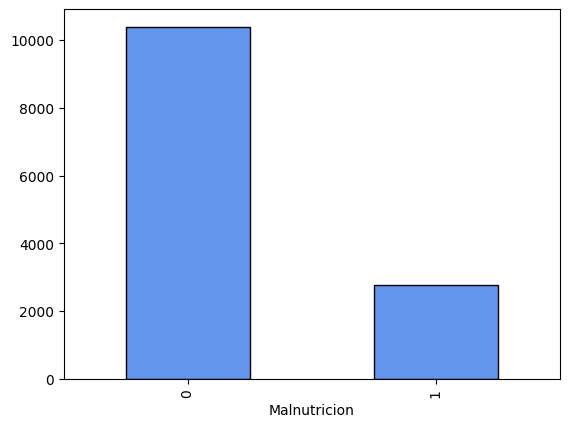

In [39]:
import matplotlib.pyplot as plt
mln = df['malnutricion'].value_counts()
mln.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.xlabel('Malnutricion')

Text(0.5, 0, 'Edad')

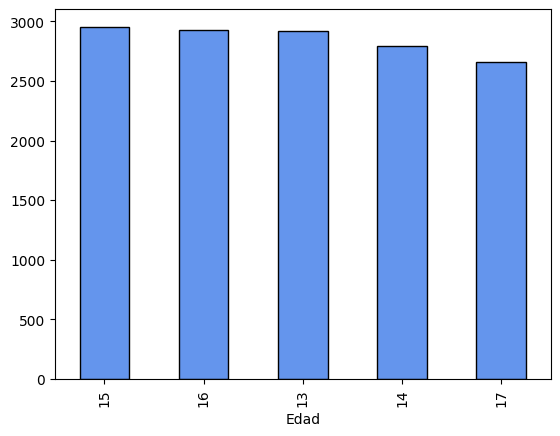

In [40]:
import matplotlib.pyplot as plt
edad = df['edad'].value_counts()
edad.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.xlabel('Edad')

Text(0.5, 0, 'Región')

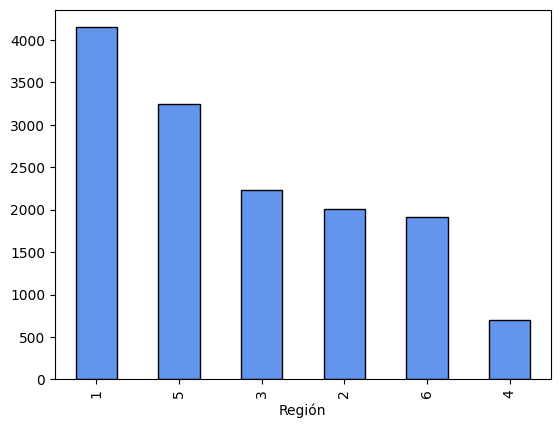

In [41]:
region = df['Region'].value_counts()

region.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.xlabel('Región')

Text(0.5, 0, 'Cuartil de riqueza armonizado')

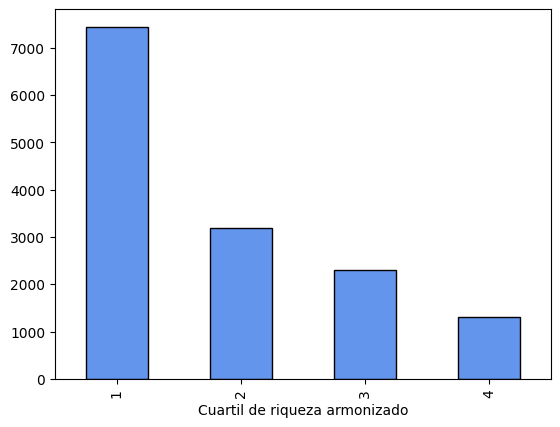

In [ ]:
cuartil_r = df['cuartil_riqueza2015'].value_counts()

cuartil_r.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.xlabel('Cuartil de riqueza armonizado')

Text(0.5, 0, 'Nivel educativo del individuo')

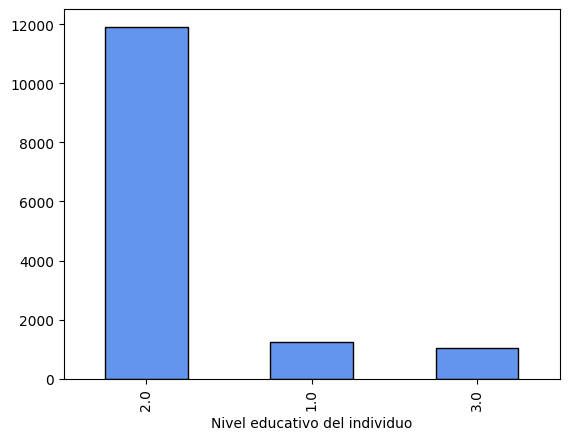

In [ ]:
edu = df['niveledu'].value_counts()
edu.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.xlabel('Nivel educativo del individuo')

Text(0.5, 0, 'Nivel educativo de la madre del individuo')

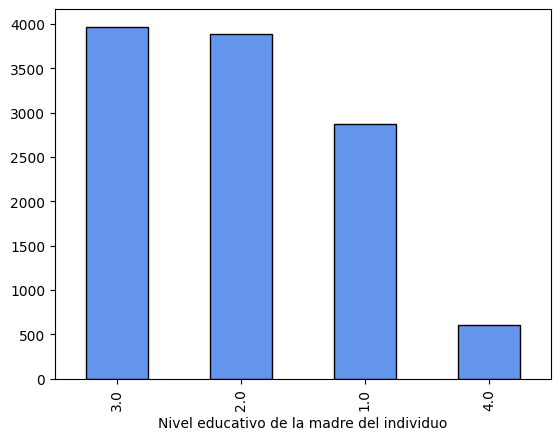

In [ ]:
edu_m = df['niveledu_MADRE'].value_counts()
edu_m.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.xlabel('Nivel educativo de la madre del individuo')

Text(0.5, 0, 'Nivel educativo del jefe del hogar del individuo')

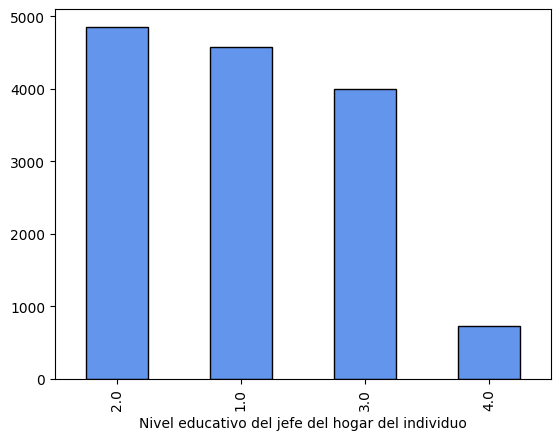

In [ ]:
edu_j = df['niveledu_jefe'].value_counts()
edu_j.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.xlabel('Nivel educativo del jefe del hogar del individuo')

Text(0.5, 0, 'Tipo de aseguramiento en salud')

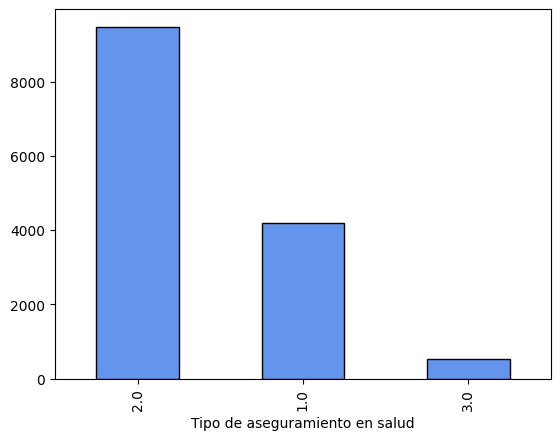

In [ ]:
eps = df['afiliado'].value_counts()

eps.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.xlabel('Tipo de aseguramiento en salud')

Text(0.5, 0, 'Tamaño del hogar')

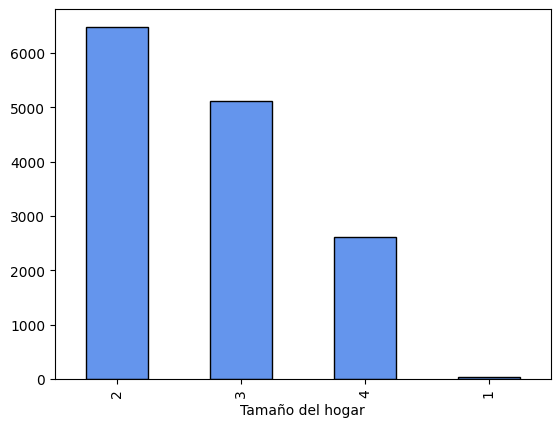

In [ ]:
hogar = df['tamanho_HH'].value_counts()

hogar.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.xlabel('Tamaño del hogar')

In [14]:

for col in df_limpio.columns:
    if col != 'edad':
        df_limpio[col] = df_limpio[col].astype('category')


for col in df_imputado.columns:
    if col != 'edad':
        df_imputado[col] = df_imputado[col].astype('category')

# Modelado para datos en los que se eliminó Na

In [66]:
df_limpio.shape

(8074, 13)

## Modelo logistico

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, average_precision_score
)
X = df_limpio_encoded.drop(columns=['malnutricion'])
y = df_limpio['malnutricion']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Modelo
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)

# Predicciones
y_pred = modelo_log.predict(X_test)

y_true = y_test
y_prob = modelo_log.predict_proba(X_test)[:, 1]  # <- PROBABILIDADES para ROC, PR AUC

y_true = y_true.astype(int)
y_pred = y_pred.astype(int)
# Evaluar
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("ROC AUC:", roc_auc_score(y_true, y_prob))
print("PR AUC:", average_precision_score(y_true, y_prob))
print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred))
print("\nReporte completo:\n", classification_report(y_true, y_pred))


Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5903248622018439
PR AUC: 0.2764979999473085
Matriz de confusión:
 [[1577    0]
 [ 442    0]]

Reporte completo:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1577
           1       0.00      0.00      0.00       442

    accuracy                           0.78      2019
   macro avg       0.39      0.50      0.44      2019
weighted avg       0.61      0.78      0.69      2019



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

## random forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_limpio_encoded.drop(columns=['malnutricion'])
y = df_limpio['malnutricion']
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Modelo base
rf = RandomForestClassifier(random_state=42)

# Parámetros que quieres probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Búsqueda en grilla con validación cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # Puedes usar 'roc_auc', 'accuracy', 'f1_macro', etc.
    n_jobs=-1,     # Usa todos los núcleos disponibles
    verbose=2
)

# Ajustar a los datos
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar en test
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan

Mejores parámetros encontrados:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1276
           1       0.31      0.14      0.19       339

    accuracy                           0.75      1615
   macro avg       0.55      0.53      0.52      1615
weighted avg       0.70      0.75      0.72      1615



                  Variable  Importancia
0                     edad     0.192847
6            niveledu_jefe     0.117082
5           niveledu_MADRE     0.106982
2      cuartil_riqueza2015     0.104361
3               tamanho_HH     0.084393
4                 niveledu     0.060142
10                Region_5     0.041085
1                     sexo     0.038213
15            afiliado_2.0     0.032218
14               etnia_3.0     0.029234
11                Region_6     0.028333
12                  area_2     0.028313
7                 Region_2     0.027704
8                 Region_3     0.025011
18  act_economica_jefe_3.0     0.021584
17  act_economica_jefe_2.0     0.020697
13               etnia_2.0     0.015908
9                 Region_4     0.013929
16            afiliado_3.0     0.011963


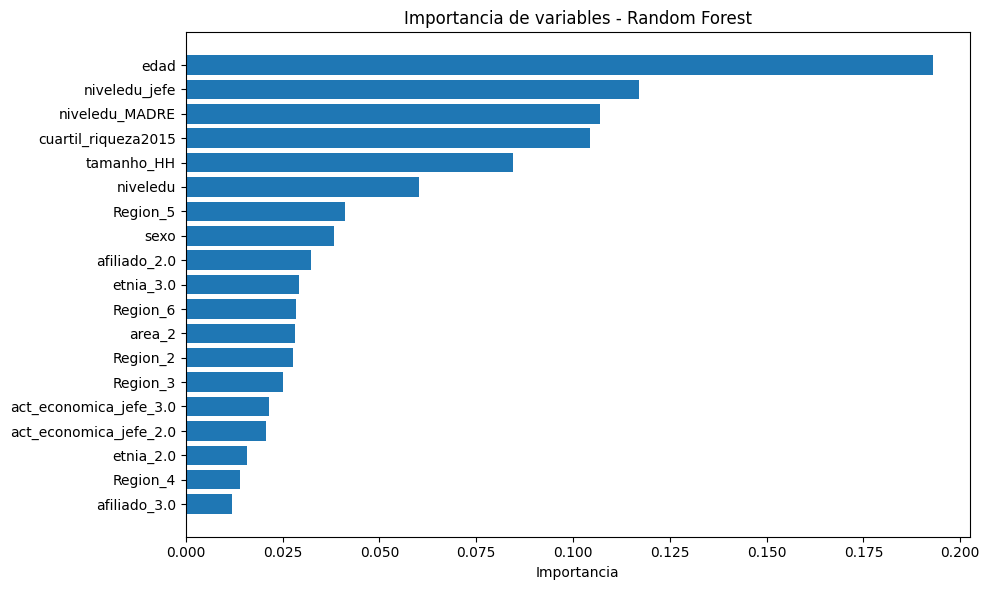

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_limpio_encoded.drop(columns=['malnutricion'])
y = df_limpio['malnutricion']
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Modelo base
modelo_rf = RandomForestClassifier(random_state=42)

modelo_rf.fit(X_train, y_train)

y_pred = modelo_rf.predict(X_test)



importancias = best_model_rf.feature_importances_

# Asociarlas con los nombres de las columnas
importancia_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar tabla
print(importancia_df)

# Gráfico
plt.figure(figsize=(10,6))
plt.barh(importancia_df['Variable'], importancia_df['Importancia'])
plt.xlabel('Importancia')
plt.title('Importancia de variables - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Gradient Boostin

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier(random_state=42)
X = df_limpio_encoded.drop(columns=['malnutricion'])
y = df_limpio['malnutricion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

y_train = y_train.astype(int)
y_test = y_test.astype(int)


grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search_gb.fit(X_train, y_train)

print("Mejores parámetros Gradient Boosting:")
print(grid_search_gb.best_params_)
best_model = grid_search_gb.best_estimator_
y_pred = best_model.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros Gradient Boosting:
{'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.88      0.83      1276
           1       0.25      0.16      0.19       339

    accuracy                           0.73      1615
   macro avg       0.52      0.52      0.51      1615
weighted avg       0.68      0.73      0.70      1615



## XGBoosting

In [92]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

X = df_limpio_encoded.drop(columns=['malnutricion'])
y = df_limpio['malnutricion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

y_train = y_train.astype(int)
y_test = y_test.astype(int)


grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search_xgb.fit(X_train, y_train)

print("Mejores parámetros XGBoost:")
print(grid_search_xgb.best_params_)
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:54:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores parámetros XGBoost:
{'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1276
           1       0.28      0.16      0.20       339

    accuracy                           0.74      1615
   macro avg       0.54      0.52      0.52      1615
weighted avg       0.69      0.74      0.71      1615



# Modelado para datos imputados

## Modelo logistico

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, average_precision_score
)
X = df_imputado_encoded.drop(columns=['malnutricion'])
y = df_imputado['malnutricion']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Modelo
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)

# Predicciones
y_pred = modelo_log.predict(X_test)

y_true = y_test
y_prob = modelo_log.predict_proba(X_test)[:, 1]  # <- PROBABILIDADES para ROC, PR AUC

y_true = y_true.astype(int)
y_pred = y_pred.astype(int)
# Evaluar
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("ROC AUC:", roc_auc_score(y_true, y_prob))
print("PR AUC:", average_precision_score(y_true, y_prob))
print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred))
print("\nReporte completo:\n", classification_report(y_true, y_pred))


Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.6020566364653647
PR AUC: 0.2544381156419666
Matriz de confusión:
 [[2131    0]
 [ 520    0]]

Reporte completo:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2131
           1       0.00      0.00      0.00       520

    accuracy                           0.80      2651
   macro avg       0.40      0.50      0.45      2651
weighted avg       0.65      0.80      0.72      2651



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

## Random forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_imputado_encoded.drop(columns=['malnutricion'])
y = df_imputado['malnutricion']
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Modelo base
rf = RandomForestClassifier(random_state=42)

# Parámetros que quieres probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Búsqueda en grilla con validación cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # Puedes usar 'roc_auc', 'accuracy', 'f1_macro', etc.
    n_jobs=-1,     # Usa todos los núcleos disponibles
    verbose=2
)

# Ajustar a los datos
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar en test
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan

Mejores parámetros encontrados:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1705
           1       0.29      0.10      0.15       416

    accuracy                           0.78      2121
   macro avg       0.55      0.52      0.51      2121
weighted avg       0.71      0.78      0.73      2121



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_imputado_encoded.drop(columns=['malnutricion'])
y = df_imputado['malnutricion']
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Modelo base
model_rf = RandomForestClassifier(max_depth = None, max_features = 'sqrt', min_samples_leaf=1, min_samples_split = 2, n_estimators = 100 ,random_state=42)

model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


                  Variable  Importancia
0                     edad     0.192847
6            niveledu_jefe     0.117082
5           niveledu_MADRE     0.106982
2      cuartil_riqueza2015     0.104361
3               tamanho_HH     0.084393
4                 niveledu     0.060142
10                Region_5     0.041085
1                     sexo     0.038213
15            afiliado_2.0     0.032218
14               etnia_3.0     0.029234
11                Region_6     0.028333
12                  area_2     0.028313
7                 Region_2     0.027704
8                 Region_3     0.025011
18  act_economica_jefe_3.0     0.021584
17  act_economica_jefe_2.0     0.020697
13               etnia_2.0     0.015908
9                 Region_4     0.013929
16            afiliado_3.0     0.011963


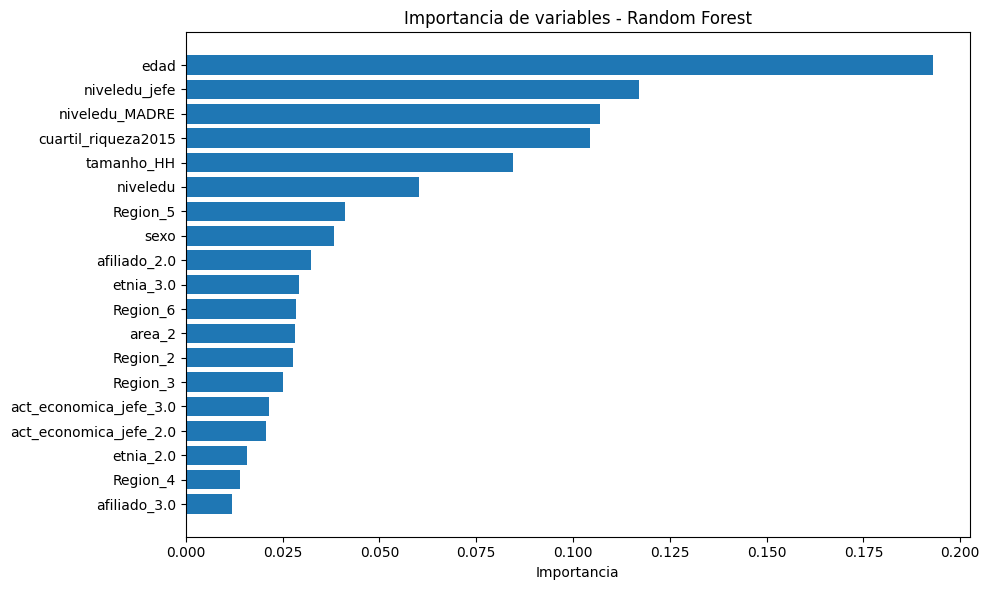

In [17]:
importancias = best_model_rf.feature_importances_

# Asociarlas con los nombres de las columnas
importancia_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar tabla
print(importancia_df)

# Gráfico
plt.figure(figsize=(10,6))
plt.barh(importancia_df['Variable'], importancia_df['Importancia'])
plt.xlabel('Importancia')
plt.title('Importancia de variables - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Gradient Boosting

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier(random_state=42)
X = df_imputado_encoded.drop(columns=['malnutricion'])
y = df_imputado['malnutricion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

y_train = y_train.astype(int)
y_test = y_test.astype(int)


grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search_gb.fit(X_train, y_train)

print("Mejores parámetros Gradient Boosting:")
print(grid_search_gb.best_params_)
best_model = grid_search_gb.best_estimator_
y_pred = best_model.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros Gradient Boosting:
{'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1705
           1       0.22      0.10      0.14       416

    accuracy                           0.76      2121
   macro avg       0.51      0.51      0.50      2121
weighted avg       0.69      0.76      0.72      2121



## XGboosting

In [109]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

X = df_imputado_encoded.drop(columns=['malnutricion'])
y = df_imputado['malnutricion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

y_train = y_train.astype(int)
y_test = y_test.astype(int)


grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search_xgb.fit(X_train, y_train)

print("Mejores parámetros XGBoost:")
print(grid_search_xgb.best_params_)
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:04:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores parámetros XGBoost:
{'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1705
           1       0.28      0.10      0.15       416

    accuracy                           0.77      2121
   macro avg       0.54      0.52      0.51      2121
weighted avg       0.71      0.77      0.73      2121

